In [50]:
from google.colab import drive
drive.mount ('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

house_data_train = '/content/drive/MyDrive/Colab Notebooks/Kaggle competition/XLSX/train.xlsx'
house_data_test = '/content/drive/MyDrive/Colab Notebooks/Kaggle competition/XLSX/test.xlsx'
missing_data = ['-', np.nan]

training_housedata = pd.read_excel(house_data_train, na_values=missing_data)
testing_housedata = pd.read_excel(house_data_test, na_values=missing_data)


In [52]:
training_housedata.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.0000",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.0000",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.0000",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.0000",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.0000",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0000,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0000,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,"1,993.0000",Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0000,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0000,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,"2,004.0000",RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0000,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,"1,973.0000",RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0000,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0000,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,"1,931.0000",Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0000,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fm

In [53]:
training_housedata.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [54]:
necessary_cols = ['Id', 'MSZoning', 'LotArea', 'Street', 'Utilities', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'Heating', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PavedDrive', 'PoolArea', 'SalePrice']

for col in training_housedata.columns:
  if col not in necessary_cols:
    training_housedata.drop(col, axis=1, inplace=True)

training_housedata

,Id,MSZoning,LotArea,Street,Utilities,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,Heating,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PavedDrive,PoolArea,SalePrice
0,1,RL,8450,Pave,AllPub,Inside,CollgCr,1Fam,2Story,7,5,2003,GasA,Y,856,854,1710,1,0,2,1,3,1,8,0,2,Y,0,208500
1,2,RL,9600,Pave,AllPub,FR2,Veenker,1Fam,1Story,6,8,1976,GasA,Y,1262,0,1262,0,1,2,0,3,1,6,1,2,Y,0,181500
2,3,RL,11250,Pave,AllPub,Inside,CollgCr,1Fam,2Story,7,5,2002,GasA,Y,920,866,1786,1,0,2,1,3,1,6,1,2,Y,0,223500
3,4,RL,9550,Pave,AllPub,Corner,Crawfor,1Fam,2Story,7,5,1970,GasA,Y,961,756,1717,1,0,1,0,3,1,7,1,3,Y,0,140000
4,5,RL,14260,Pave,AllPub,FR2,NoRidge,1Fam,2Story,8,5,2000,GasA,Y,1145,1053,2198,1,0,2,1,4,1,9,1,3,Y,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,RL,7917,Pave,AllPub,Inside,Gilbert,1Fam,2Story,6,5,2000,GasA,Y,953,694,1647,0,0,2,1,3,1,7,1,2,Y,0,175000
1456,1457,RL,13175,Pave,AllPub,Inside,NWAmes,1Fam,1Story,6,6,1988,GasA,Y,2073,0,2073,1,0,2,0,3,1,7,2,2,Y,0,210000
1457,1458,RL,9042,Pave,AllPub,Inside,Crawfor,1Fam,2Story,7,9,2006,GasA,Y,1188,1152,2340,0,0,2,0,4,1,9,2,1,Y,0,266500
1458,1459,RL,9717,Pave,AllPub,Inside,NAmes,1Fam,1Story,5,6,1996,GasA,Y,1078,0,1078,1,0,1,0,2,1,5,0,1,Y,0,142125


In [55]:
training_housedata.isnull().sum()

Id              0
MSZoning        0
LotArea         0
Street          0
Utilities       0
LotConfig       0
Neighborhood    0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearRemodAdd    0
Heating         0
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
PavedDrive      0
PoolArea        0
SalePrice       0
dtype: int64

In [56]:
training_housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   MSZoning      1460 non-null   object
 2   LotArea       1460 non-null   int64 
 3   Street        1460 non-null   object
 4   Utilities     1460 non-null   object
 5   LotConfig     1460 non-null   object
 6   Neighborhood  1460 non-null   object
 7   BldgType      1460 non-null   object
 8   HouseStyle    1460 non-null   object
 9   OverallQual   1460 non-null   int64 
 10  OverallCond   1460 non-null   int64 
 11  YearRemodAdd  1460 non-null   int64 
 12  Heating       1460 non-null   object
 13  CentralAir    1460 non-null   object
 14  1stFlrSF      1460 non-null   int64 
 15  2ndFlrSF      1460 non-null   int64 
 16  GrLivArea     1460 non-null   int64 
 17  BsmtFullBath  1460 non-null   int64 
 18  BsmtHalfBath  1460 non-null   int64 
 19  FullBa

In [57]:
necessary_test_cols = ['Id', 'MSZoning', 'LotArea', 'Street', 'Utilities', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'Heating', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PavedDrive', 'PoolArea']

for col in testing_housedata.columns:
  if col not in necessary_test_cols:
    testing_housedata.drop(col, axis=1, inplace=True)

testing_housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1459 non-null   int64  
 1   MSZoning      1455 non-null   object 
 2   LotArea       1459 non-null   int64  
 3   Street        1459 non-null   object 
 4   Utilities     1457 non-null   object 
 5   LotConfig     1459 non-null   object 
 6   Neighborhood  1459 non-null   object 
 7   BldgType      1459 non-null   object 
 8   HouseStyle    1459 non-null   object 
 9   OverallQual   1459 non-null   int64  
 10  OverallCond   1459 non-null   int64  
 11  YearRemodAdd  1459 non-null   int64  
 12  Heating       1459 non-null   object 
 13  CentralAir    1459 non-null   object 
 14  1stFlrSF      1459 non-null   int64  
 15  2ndFlrSF      1459 non-null   int64  
 16  GrLivArea     1459 non-null   int64  
 17  BsmtFullBath  1457 non-null   float64
 18  BsmtHalfBath  1457 non-null 

In [58]:
testing_housedata.isnull().sum()

Id              0
MSZoning        4
LotArea         0
Street          0
Utilities       2
LotConfig       0
Neighborhood    0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearRemodAdd    0
Heating         0
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      1
PavedDrive      0
PoolArea        0
dtype: int64

In [59]:
#fill these = BsmtFullBath', 'BsmtHalfBath

testing_housedata['BsmtFullBath'].fillna(testing_housedata['BsmtFullBath'].mean(), inplace=True)
testing_housedata['BsmtHalfBath'].fillna(testing_housedata['BsmtHalfBath'].mean(), inplace=True)

In [60]:
testing_housedata.drop(columns=['MSZoning', 'Utilities', 'GarageCars'], inplace=True)

In [61]:
testing_housedata.isnull().sum()

Id              0
LotArea         0
Street          0
LotConfig       0
Neighborhood    0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearRemodAdd    0
Heating         0
CentralAir      0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
PavedDrive      0
PoolArea        0
dtype: int64

In [62]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

for col in training_housedata.columns:
  if training_housedata[col].dtypes == 'object':
    training_housedata[[col]] = encoder.fit_transform(training_housedata[[col]])
  else:
    continue

for col in testing_housedata.columns:
  if testing_housedata[col].dtypes == 'object':
    testing_housedata[[col]] = encoder.fit_transform(testing_housedata[[col]])
  else:
    continue

In [63]:
correlation = training_housedata.corr()

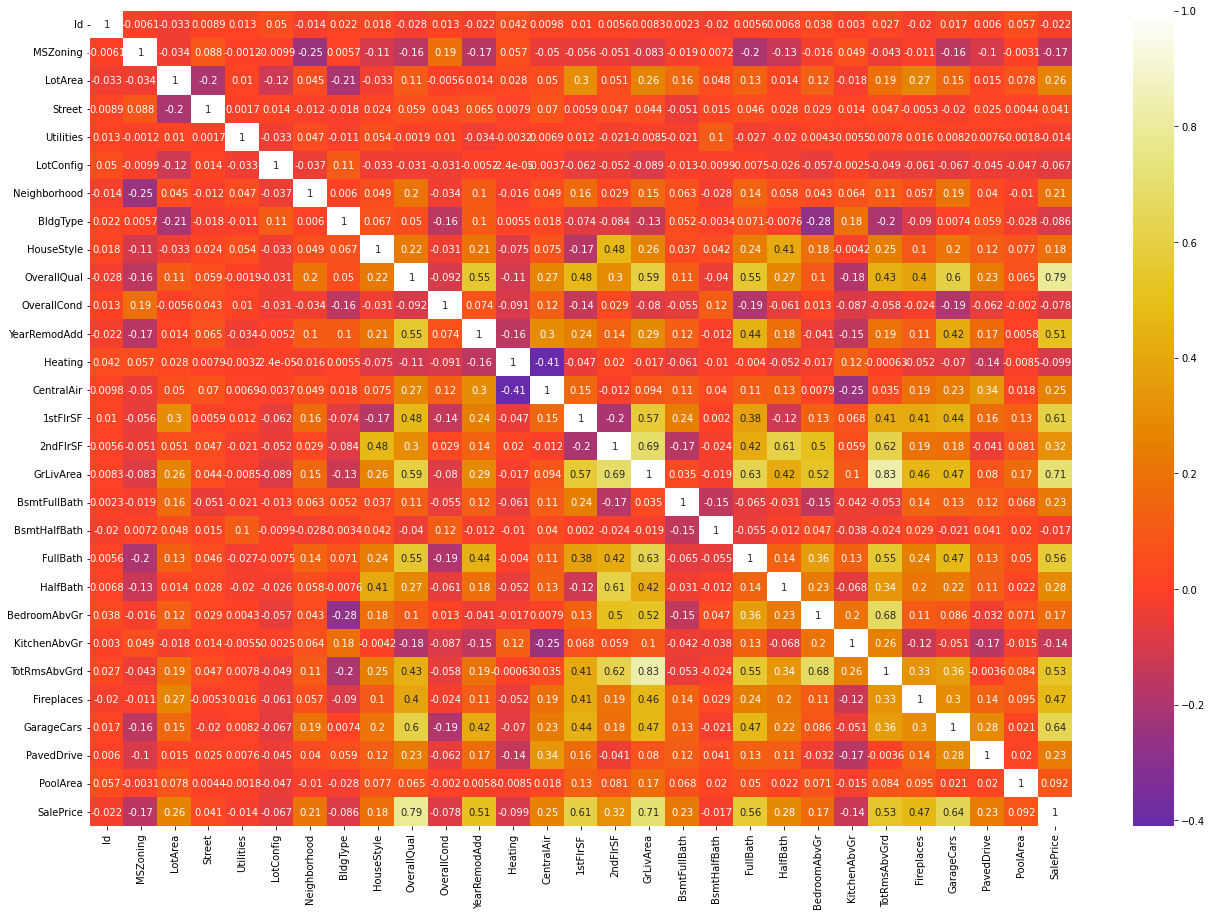

In [64]:
plt.figure(figsize=(22,15))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True, cmap='CMRmap', center=0)
plt.show()

In [65]:
def correlated_features(data, cutoff):
  correlation_graph = data.corr()
  correlated_columns = set()
  for a in range(len(correlation_graph.columns)):
    for b in range(a):
      if abs(correlation_graph.iloc[a, b]) > cutoff:
        col_name = correlation_graph.columns[a]
        correlated_columns.add(col_name)
  return correlated_columns

In [66]:
correlated = correlated_features(training_housedata, 0.6)
correlated

{'FullBath',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'SalePrice',
 'TotRmsAbvGrd'}

In [67]:
training_housedata.drop(columns=['FullBath', 'GarageCars', 'GrLivArea', 'HalfBath'], inplace=True)

In [68]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import metrics
from math import sqrt
from xgboost import XGBRegressor

In [69]:
X = training_housedata.drop(columns=['SalePrice', 'Id'])

In [70]:
y = training_housedata['SalePrice']

In [71]:
high_contributing_features = SelectKBest(score_func=chi2, k=10)
high_contributing_features_fit = high_contributing_features.fit(X, y)

In [72]:
pd.options.display.float_format = "{:,.4f}".format

best_columns = pd.DataFrame()
best_columns['Column Name'] = X.columns
best_columns['Scores'] = high_contributing_features_fit.scores_
best_columns.nlargest(12, "Scores")

,Column Name,Scores
1,LotArea,"10,114,971.4000"
14,2ndFlrSF,"464,884.0659"
22,PoolArea,"383,564.2146"
13,1stFlrSF,"123,809.8313"
5,Neighborhood,"2,194.2671"
6,BldgType,"1,951.4782"
7,HouseStyle,812.8877
16,BsmtHalfBath,597.2246
20,Fireplaces,570.5073
4,LotConfig,564.6336


In [73]:
most_contributing_columns = ['LotArea',	'2ndFlrSF', 'PoolArea',	'1stFlrSF',	'Neighborhood', 'BldgType', 'HouseStyle', 'BsmtHalfBath', 'Fireplaces',	'LotConfig', 'BsmtFullBath',	'OverallQual']

In [74]:
for col in X.columns:
  if col not in most_contributing_columns:
    X.drop(col, axis=1, inplace=True)
  else:
    continue

In [75]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=0)

In [76]:
model_boost = XGBRegressor()
model_boost.fit(X_train, y_train)

[20:59:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [77]:
predictions = model_boost.predict(X_val)
predictions

array([231693.77 , 157385.89 , 138795.84 , 217842.08 , 109381.29 ,
       121393.484, 273107.25 , 138561.55 , 697710.9  , 144924.66 ,
       190753.2  , 139655.83 , 207680.69 , 134108.39 , 149039.31 ,
       146263.78 , 232218.58 , 125625.16 , 124560.37 , 183465.86 ,
       119624.27 , 146014.77 , 110822.27 , 158749.56 , 183725.1  ,
       226864.28 , 160509.23 ,  87007.13 , 315868.9  , 107323.37 ,
       160806.   , 193343.83 , 148780.2  , 304411.4  , 309148.6  ,
       202744.11 , 310151.47 , 128649.766, 240340.11 , 337323.3  ,
       208361.19 , 144840.7  , 186592.23 , 313019.16 , 354410.28 ,
       144374.98 , 115859.89 , 130666.57 , 165503.77 , 102337.74 ,
       405193.2  , 136469.14 , 162335.56 , 113186.08 , 242507.11 ,
       103788.48 , 118037.195, 214661.55 , 132206.2  ,  94555.88 ,
       148262.55 , 125231.99 , 146655.02 , 155480.88 , 186609.67 ,
       183887.77 , 118971.18 , 218885.84 , 111839.45 , 213427.89 ,
       177811.83 , 144732.42 ,  80195.44 , 243725.22 , 101492.

In [78]:
rmse = sqrt(metrics.mean_squared_error(y_val, predictions))
rmse

29810.456109904942

In [79]:
r2 = metrics.r2_score(y_val, predictions)
r2

0.8713173181993981

In [80]:
parameters = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [2, 3, 4, 5], 'booster': ['gbtree', 'gblinear'], 'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25], 'min_child_weight': [1, 2, 3, 4]}
randomised_search = RandomizedSearchCV(estimator=model_boost, param_distributions=parameters, cv=5, n_iter=40, scoring='neg_mean_squared_error', verbose=5, return_train_score=True, random_state=0)

In [81]:
randomised_search.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[20:59:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5] END booster=gbtree, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=500;, score=(train=-17027672.773, test=-1004809757.362) total time=   0.4s
[20:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5] END booster=gbtree, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=500;, score=(train=-17593315.730, test=-1952077614.891) total time=   0.4s
[20:59:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5] END booster=gbtree, learning_rate=0.2, max_depth=4, min_child_weight=4, n_estimators=500;, score=(train=-17733069.735, test=-935339369.863) total time=   0.4s
[20:59:06] WARNING: /workspace/src/objective/regres

RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=40,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=0, return_train_score=True,
                   scoring='neg_mean_squared_error', verbose=5)

In [82]:
randomised_search.best_estimator_

XGBRegressor(learning_rate=0.2, max_depth=2, min_child_weight=2,
             n_estimators=300)

In [83]:
model_boost_tuned = XGBRegressor(learning_rate=0.2, max_depth=2, min_child_weight=2, n_estimators=300)

In [84]:
model_boost_tuned.fit(X_train, y_train)

[20:59:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, max_depth=2, min_child_weight=2,
             n_estimators=300)

In [85]:
tuned_predictions = model_boost_tuned.predict(X_val)
tuned_predictions

array([205694.67 , 161293.28 , 137780.98 , 222515.3  , 103369.79 ,
       118476.14 , 274697.4  , 131024.64 , 703363.9  , 138480.39 ,
       180324.92 , 134559.06 , 204327.84 , 138094.78 , 145646.31 ,
       147282.48 , 240651.67 , 127812.58 , 129263.53 , 167938.83 ,
       129327.9  , 147629.06 ,  99966.15 , 164089.3  , 175666.25 ,
       215913.5  , 159475.6  ,  85267.44 , 319733.28 , 111179.45 ,
       140715.38 , 204923.58 , 151230.78 , 306917.25 , 327836.38 ,
       203527.73 , 306778.34 , 135538.9  , 257027.08 , 347134.3  ,
       204123.55 , 137167.42 , 188620.98 , 309226.3  , 375256.1  ,
       163140.64 , 112087.266, 139288.95 , 169878.17 , 100477.69 ,
       428101.25 , 138565.22 , 164527.75 , 105078.805, 244926.84 ,
       102518.37 , 112957.125, 215316.33 , 134175.75 ,  91290.984,
       150702.03 , 128463.54 , 150790.06 , 160518.84 , 177626.1  ,
       181832.28 , 121036.91 , 192853.83 , 131640.94 , 199842.8  ,
       182219.6  , 136484.1  ,  84959.65 , 245032.47 ,  95642.

In [86]:
rmse = sqrt(metrics.mean_squared_error(y_val, tuned_predictions))
rmse

28517.42982415328

In [87]:
r2 = metrics.r2_score(y_val, tuned_predictions)
r2

0.8822384198882826

In [88]:
test_most_contributing_columns = ['LotArea',	'2ndFlrSF', 'PoolArea',	'1stFlrSF',	'Neighborhood', 'BldgType', 'HouseStyle', 'BsmtHalfBath', 'Fireplaces',	'LotConfig', 'BsmtFullBath',	'OverallQual']

X_test = testing_housedata.drop(columns=['Id'])

In [89]:
for col in X_test.columns:
  if col not in test_most_contributing_columns:
    X_test.drop(col, axis=1, inplace=True)
  else:
    continue

In [90]:
test_prediction = model_boost_tuned.predict(X_test)
test_prediction

array([117449.13, 158374.7 , 171010.23, ..., 158469.39, 129435.06,
       197028.17], dtype=float32)

In [91]:
my_submission = pd.DataFrame()

In [92]:
my_submission['Id'] = testing_housedata['Id']

In [93]:
my_submission['SalePrice'] = test_prediction
my_submission

,Id,SalePrice
0,1461,"117,449.1328"
1,1462,"158,374.7031"
2,1463,"171,010.2344"
3,1464,"150,147.3906"
4,1465,"196,310.2656"
...,...,...
1454,2915,"65,277.9023"
1455,2916,"73,213.0469"
1456,2917,"158,469.3906"
1457,2918,"129,435.0625"


In [94]:
my_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/Kaggle competition/Predicted Price - House Price Competition/submission.csv', index=False)